In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator


os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [2]:
path = "../img/detection"
path_dog = os.path.join(path, 'dog')
path_nodog = os.path.join(path, 'no_dog')

path_dog_corgi = os.path.join(path_dog, 'corgi')
path_dog_shiba = os.path.join(path_dog, 'shiba')
path_dog_gr = os.path.join(path_dog, 'gr')

path_nodog_parrot = os.path.join(path_nodog, 'parrot')
path_nodog_tiger = os.path.join(path_nodog, 'tiger')
path_nodog_rabbit = os.path.join(path_nodog, 'rabbit')
class_names = ['dog', 'no_dog']

In [3]:
split = 0.2

num_corgi = len(os.listdir(path_dog_corgi))
num_shiba = len(os.listdir(path_dog_shiba))
num_gr = len(os.listdir(path_dog_gr))
num_dogs = num_gr + num_shiba + num_corgi

num_parrot = len(os.listdir(path_nodog_parrot))
num_tiger = len(os.listdir(path_nodog_tiger))
num_rabbit = len(os.listdir(path_nodog_rabbit))
num_nodogs = num_parrot + num_tiger + num_rabbit

total_img_num = num_dogs + num_nodogs

total_val = total_img_num * split
total_train = total_img_num - total_val

In [4]:
epochs = 35
IMG_HEIGHT = 224
IMG_WIDTH = 224
batch_size = 50 #128

In [5]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=split)

train_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='training') # set as training data

validation_generator = data_generator.flow_from_directory(
    directory=path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True,
    subset='validation') # set as validation data

Found 5217 images belonging to 2 classes.
Found 1303 images belonging to 2 classes.


## 1. 11 5 3 no dropout

In [6]:
model_1 = Sequential([
     Conv2D(16, (7,7), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, (5,5), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_1.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      2368      
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 16)      64        
_________________________________________________________________
activation (Activation)      (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      12832     
_________________________________________________________________
batch_normali

In [7]:
history_1 = model_1.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
  6/104 [>.............................] - ETA: 36s - loss: 0.7375 - acc: 0.5200

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 133s 1s/step - loss: 0.7325 - acc: 0.7345 - val_loss: 0.7469 - val_acc: 0.5085
Epoch 2/35
104/104 [==============================] - 125s 1s/step - loss: 0.4280 - acc: 0.8101 - val_loss: 0.8599 - val_acc: 0.5200
Epoch 3/35
104/104 [==============================] - 125s 1s/step - loss: 0.3787 - acc: 0.8370 - val_loss: 0.8829 - val_acc: 0.5731
Epoch 4/35
104/104 [==============================] - 126s 1s/step - loss: 0.3526 - acc: 0.8535 - val_loss: 0.5937 - val_acc: 0.6931
Epoch 5/35
104/104 [==============================] - 126s 1s/step - loss: 0.3122 - acc: 0.8690 - val_loss: 0.4992 - val_acc: 0.7569
Epoch 6/35
104/104 [==============================] - 134s 1s/step - loss: 0.2938 - acc: 0.8879 - val_loss: 0.3555 - val_acc: 0.8400
Epoch 7/35
104/104 [==============================] - 129s 1s/step - loss: 0.2502 - acc: 0.8963 - val_loss: 2.5126 - val_acc: 0.4938
Epoch 8/35
104/104 [==============================] - 126s 1s/step - loss: 0.205

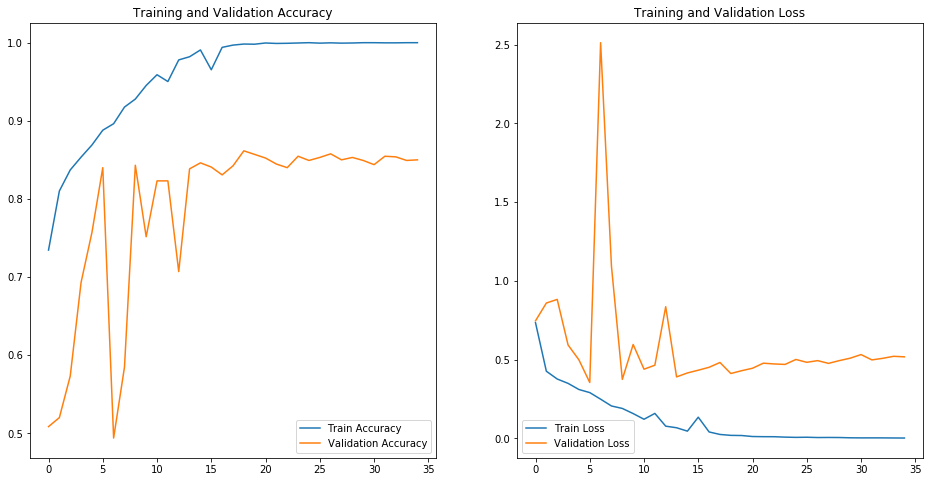

In [8]:
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()

In [9]:
model_2 = Sequential([
     Conv2D(16, (7,7), padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(32, (5,5), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),
    Dropout(0.8),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid')
])

model_2.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      2368      
_________________________________________________________________
batch_normalization_3 (Batch (None, 224, 224, 16)      64        
_________________________________________________________________
activation_3 (Activation)    (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      12832     
_________________________________________________________________
batch_normalization_4 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
activation_4 (Activation)    (None, 112, 112, 32)     

In [10]:
history_2 = model_2.fit_generator(
    train_generator,
    steps_per_epoch = total_train // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = total_val // batch_size
)

Epoch 1/35
  5/104 [>.............................] - ETA: 35s - loss: 0.6918 - acc: 0.5600

C:\Users\ABC\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


104/104 [==============================] - 128s 1s/step - loss: 1.0623 - acc: 0.6578 - val_loss: 0.7091 - val_acc: 0.5292
Epoch 2/35
104/104 [==============================] - 127s 1s/step - loss: 0.5665 - acc: 0.7329 - val_loss: 0.8682 - val_acc: 0.5254
Epoch 3/35
104/104 [==============================] - 127s 1s/step - loss: 0.5339 - acc: 0.7478 - val_loss: 0.6342 - val_acc: 0.6815
Epoch 4/35
104/104 [==============================] - 127s 1s/step - loss: 0.5202 - acc: 0.7571 - val_loss: 0.6130 - val_acc: 0.6562
Epoch 5/35
104/104 [==============================] - 127s 1s/step - loss: 0.4952 - acc: 0.7799 - val_loss: 0.5237 - val_acc: 0.7654
Epoch 6/35
104/104 [==============================] - 127s 1s/step - loss: 0.4995 - acc: 0.7780 - val_loss: 1.2808 - val_acc: 0.4915
Epoch 7/35
104/104 [==============================] - 127s 1s/step - loss: 0.4772 - acc: 0.7908 - val_loss: 0.6243 - val_acc: 0.5954
Epoch 8/35
104/104 [==============================] - 128s 1s/step - loss: 0.472

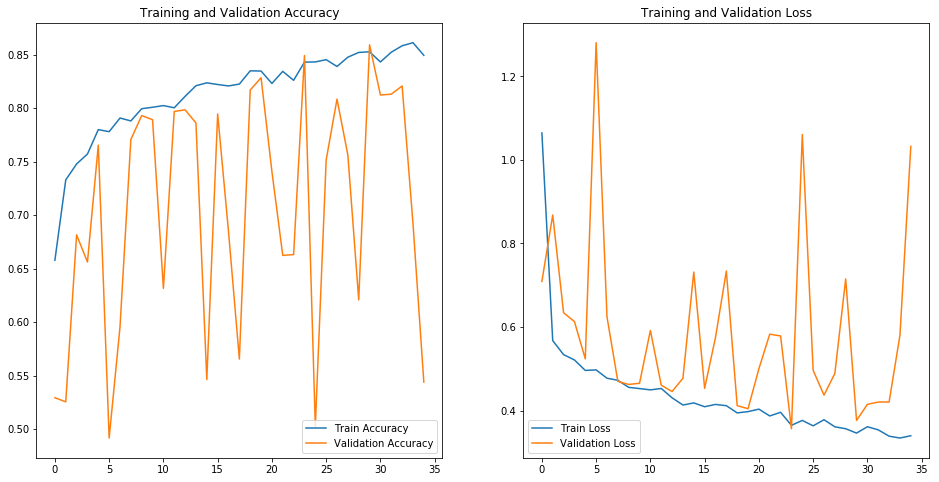

In [11]:
acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')

plt.show()